1. Data Processing:

In [6]:
import pandas as pd
import numpy as np
path = "Downloads/default of credit card clients.xls"
df = pd.read_excel(path)
df = df.dropna()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(30000, 24)

In [8]:
y = df["default payment next month"]
x = df.loc[:, df.columns != 'default payment next month']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


2. Random Forest Classifier - Base Model:

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as skm

rfc = RandomForestClassifier(n_estimators=10, random_state=101)
rfc.fit(X_train, y_train)

train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

train_proba = rfc.predict_proba(X_train)
test_proba = rfc.predict_proba(X_test)

In [20]:
print("\Train Confusion Matrix")
print(skm.confusion_matrix(y_train, train_pred))
print("\nTrain Classification Report")
print(skm.classification_report(y_train, train_pred))
print("\nTrain ROC AUC")
print(skm.roc_auc_score(y_train, train_proba[:,1]))

Train Score is: 0.9793333333333333

Train Confusion Matrix
[[16284    22]
 [  412  4282]]

Train Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16306
           1       0.99      0.91      0.95      4694

    accuracy                           0.98     21000
   macro avg       0.99      0.96      0.97     21000
weighted avg       0.98      0.98      0.98     21000


Train ROC AUC
0.999152133637619


In [21]:
print("Test Confusion Matrix")
print(skm.confusion_matrix(y_test, test_pred))
print("\nTest Classification Report")
print(skm.classification_report(y_test, test_pred))
print("\nTest ROC AUC")
print(skm.roc_auc_score(y_test, test_proba[:,1]))

Test Score: 0.8056666666666666

Test Confusion Matrix
[[6637  421]
 [1328  614]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7058
           1       0.59      0.32      0.41      1942

    accuracy                           0.81      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000


Test ROC AUC
0.7289395807986729


e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

Answer: There are signs of overfitting. First, the training ROC AUC score for trainning is extremely high (0.999), which is an sign of extreme overfitting. Further, the trianing precision, recall, accuracy and ROC AUC scores are very high (all in the high 90s%) while the testing precision, recall accuracy and ROC AUC scores are significantly lower (mostly around 70%), which is an indication that the model fits very well with the training data but not so well with the testing data (overfitting).

3. Random Forest Classifier - Grid Search:

In [25]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters 
param_grid = {'max_depth':[6, 8, 10, 12],
'n_estimators':[50, 100, 500],
'max_features':[2, 4, 6],
'random_state':[101]}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [26]:
rf_Grid.best_params_

{'max_depth': 12, 'max_features': 2, 'n_estimators': 500, 'random_state': 101}

In [27]:
rf_Grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [32]:
rf = rf_Grid.best_estimator_

train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)

train_probab = rf.predict_proba(X_train)
test_probab = rf.predict_proba(X_test)

In [33]:
print("Train Confusion Matrix")
print(skm.confusion_matrix(y_train, train_predict))
print("\nTrain Classification Report")
print(skm.classification_report(y_train, train_predict))
print("\nTrain ROC AUC:", skm.roc_auc_score(y_train, train_probab[:,1]))

Train Confusion Matrix
[[16106   200]
 [ 2483  2211]]

Train Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     16306
           1       0.92      0.47      0.62      4694

    accuracy                           0.87     21000
   macro avg       0.89      0.73      0.77     21000
weighted avg       0.88      0.87      0.86     21000


Train ROC AUC: 0.9082534935423091


In [35]:
print("Test Confusion Matrix")
print(skm.confusion_matrix(y_test, test_predict))
print("\nTest Classification Report")
print(skm.classification_report(y_test, test_predict))
print("\nTest ROC AUC:", skm.roc_auc_score(y_test, test_probab[:,1]))

Test Confusion Matrix
[[6768  290]
 [1349  593]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7058
           1       0.67      0.31      0.42      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000


Test ROC AUC: 0.7772604817111946


f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

Answer: There are signs of overfitting. The trianing precision, recall, accuracy and ROC AUC scores are very high (all around 90%) while the testing precision, recall accuracy and ROC AUC scores are relatively lower (mostly around 80%), which might an indication that the model fits  well with the training data but not as well with the testing data (overfitting).

4. Create a feature importance plot for your best performing model.

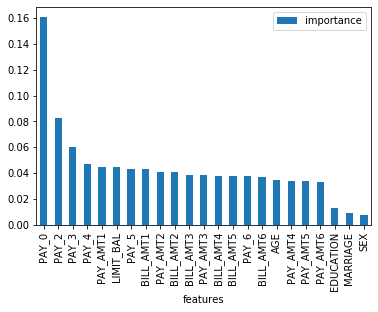

In [38]:
fi = pd.DataFrame({'features': X_train.columns, 'importance': rf.feature_importances_})
fi.sort_values('importance', ascending=False, inplace=True)
fi.plot.bar(x='features', y='importance')

a) What are the top 5 features for this model?

Answer: The top 5 features for this model are PAY_0, PAY_2, PAY_3, PAY_4 and PAY_AMT1. 

5. Conceptual Questions:

a) What are the best parameters from the Grid Search in Question # 3? Does the Model from # 3 outperform Model # 2? Explain why.

Answer: The best parameters from the Grid Search in model 3 are max_depth = 12, max_features = 2, and n_estimators = 500. For training data, model 2 has higher precision, recall, accuray, and ROC AUC scores while for testing data, model 3 has higher precision, recall, accuracy and ROC AUC scores. However, the high training scores and low testing scores in model 2 seems to indicate that model 2 is overfitting the data. Therefore, we conclude model 3 outperform model 2.

b) Overfitting is always a concern in ML problems. Does Model # 3 overfit data more or less than Model # 2? Explain why you think this is the case.

Answer: Even though both model 2 and model 3 have signs of overfitting, model 2's training scores are extremely high (more likely to indicate overfitting) and the difference between training and testing scores for model 2 is bigger than the difference between training and testing scores for model 3. Therefore, model 3 overfits data less than model 2. One of the reasons why model 2 overfits data less than model 2 is because we use 5 cross fold validation in model 2, using cross validation can help find the optimal parameters and mitigate overfiting (please refer to question f as to how cross validation works). 

c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?).

Answer: We use the Gini index to measure the impurity of each node. The lower the Gini index in a specific node, the fewer classes that the samples in the nodes belongs to, which indicates the classification tree has done a good job in separating each class. The Gini index is calculated by one minus the sum of the squared ratios of class k instance in a specific node. For instance, if at one node, there are total of 50 samples with k possible classes, then the Gini index is one minus the sum of the squared ratios of this 50 samples being classified into k different classes. If all the samples in this node only belongs to class k, then the sum of these ratios should be 1 (squared(50/50) for class k and squared(0/50) for all other classes), and the Gini index should be 0, which is means the splits leading to this node has done a very good job in classifying class k samples as the samples in this node only belongs to one class. Using the Gini index to evaluate the performance of each split by calculating the purity of all its resulting nodes, and it can help us measure the performance of our tree.

d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

Answer: The main difference between random forest and bagging trees is that Random forests only takes a subset of features at random and split a node based on that subset of features. For bagging tress, all the features are considered when determining the split of a node. For bagging trees, since it takes all the features to split a tree, not only the trees depend heavily on the training sample, but they are also highly correlated in the prediction. On the other hand, since random forest only takes a subset of features to determine the split, the trees are more independent of each other as compared to bagging trees, and by reducing correlation between trees, random forest helps reduce variances. 

e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

Answer: The max_depth parameter in random forest represents the depth of each tree in the forest. The deeper the tree, the more splits it has, and the more information the tree captured. However, having more splits might cause overfit because it captures too many information about the training dataset that might not be relevant to the testing data. Therefore, setting the max depth of the trees can avoid overfit. The deeper the trees grow, the more variance in the model since it captures more information than needed from the training data. On the other hand, severely limiting the depth of the trees can lead to increase of bias since it might not be able to capture all the useful information in the training data before hitting the limit. 

f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

Answer: 
a) K-fold cross-validation is when a dataset is split into k number of subsets where each subset is used as a testing set at some point. For instance, in model 3 in this homework, we used 5-Fold cross validation in our random forest model, which our dataset is split into 5 subsets. In the first iteration, the first subset is used as our testing set and the rest of the 4 subset are used to train the model. In the second iteration, the second subset is used as the testing set and the rest are used as the training set. This process is repeated until each of the 5 subsets have been used as the testing set.

b) The benefit of using k-fold cross-validation when tuning our random forest model is that all of our data will be used in the training and testing set at some point during the process, which can avoid fitting and testing the data only by a random subset of our data. Since in random forest, the splits of the tree depend heavily on the training set, if the randomly selected training set is not a good representative of the whole dataset, the trained tree might be bias toward the training data, which then lead to bad performance in testing. On the other hand, using k-fold cross-validation can avoid this problem since the parameters are tuned and the results are validated during the process when each subset of the data is used as training and testing set. Thus, the final trained model would be more generalized and representative for the entire dataset. 